In [17]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor

import numpy as np
np.random.seed(0)
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

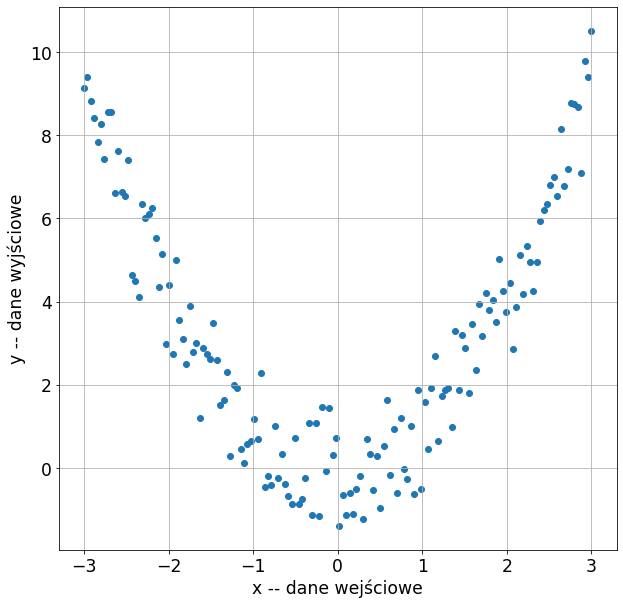

In [18]:
n = 150
x = np.linspace(-3, 3, n)
y = x**2 +(3 * np.random.rand(n) - 1.5)

params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
         'axes.facecolor':'white'}
plt.rcParams.update(params)

plt.figure(figsize=(10,10),
          facecolor='white')
plt.scatter(x, y)
plt.xlabel('x -- dane wejściowe')
plt.ylabel('y -- dane wyjściowe')
plt.grid()

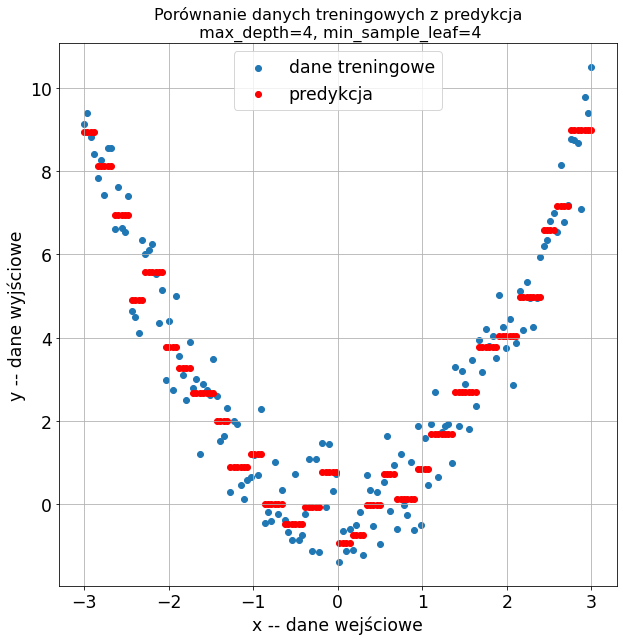

In [24]:
max_depth = 4
min_samples_leaf = 4

model = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
model.fit(x.reshape(-1,1), y)
y_predict = model.predict(x.reshape(-1, 1))

#######################################

params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
         'axes.facecolor':'white'}
plt.rcParams.update(params)

plt.figure(figsize=(10,10), facecolor='white')

plt.scatter(x,y, label='dane treningowe')
plt.scatter(x, y_predict, label='predykcja', color='red')
plt.legend(loc='upper center')
plt.xlabel('x -- dane wejściowe')
plt.ylabel('y -- dane wyjściowe')
plt.title('Porównanie danych treningowych z predykcja\n max_depth={}, min_sample_leaf={}'.format(max_depth, min_samples_leaf),
         fontsize=16)
plt.grid()

# klasyfikacja

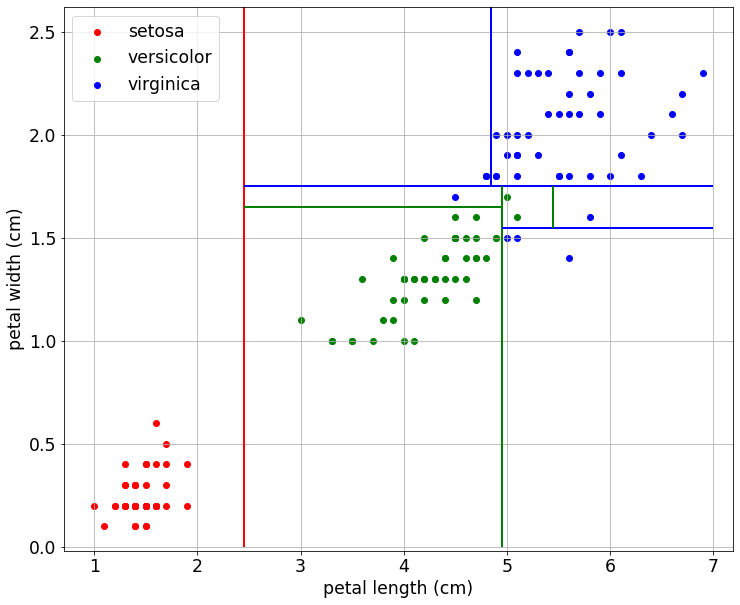

In [9]:
data = load_iris()

iris = pd.DataFrame(data=np.c_[data['data'],  data.target_names[data.target]],
                   columns=data.feature_names+['target'])
iris[data.feature_names] = iris[data.feature_names].astype(np.float16)

params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
         'axes.facecolor':'white'}
plt.rcParams.update(params)
plt.figure(figsize=(12,10), facecolor='white')

color =  ["red","green","blue"]

for i in range(0,3):
    iris_part = iris[iris['target']==data.target_names[i]]
    
    plt.scatter(iris_part[data.feature_names[2]], 
                iris_part[data.feature_names[3]],
                color=color[i],
                label=data.target_names[i])
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
plt.legend(loc='upper left')
plt.grid()

l1 = [(2.45, 0), (2.45, 2.7)]
l2 = [(2.45, 1.75), (7, 1.75)]
l3 = [(4.949, 0), (4.949, 1.75)]
l4 = [(4.85, 1.75), (4.85, 2.7)]
l5 = [(2.45, 1.65), (4.949, 1.65)]
l6 = [(4.949, 1.55), (7, 1.55)]
l7 = [(5.451, 1.55), (5.451, 1.75)]

lc = LineCollection([l1, 
                      l2, 
                      l3, 
                      l4, 
                      l5, 
                      l6, 
                      l7
                    ], 
                    color=["red","blue", 'green', 'blue', 'green', 'blue', 'green'], 
                    lw=2)

plt.gca().add_collection(lc)


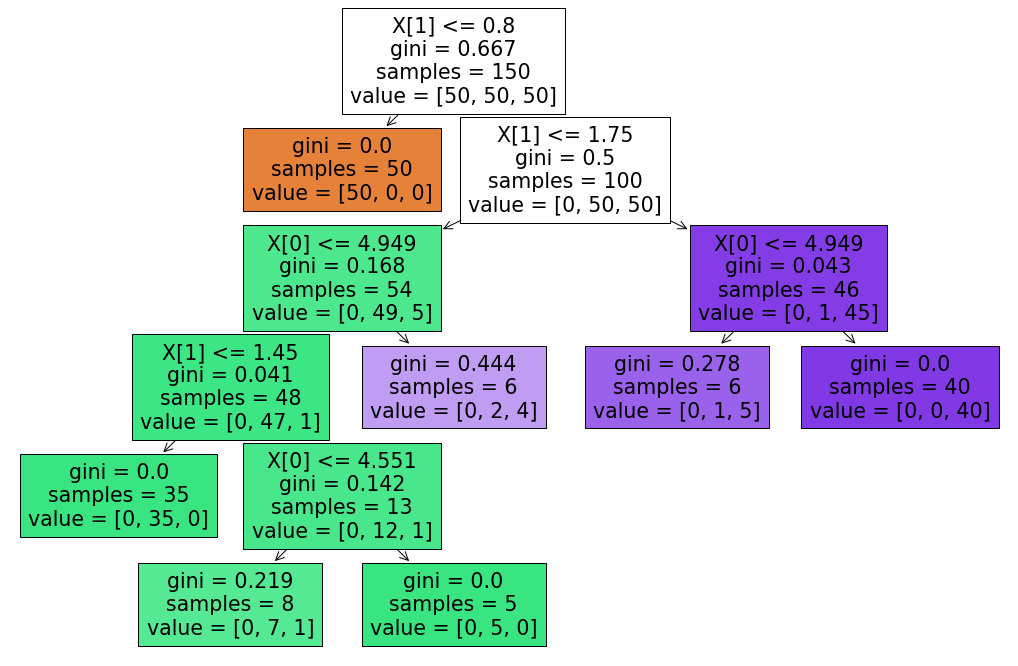

In [15]:
model = DecisionTreeClassifier(criterion='gini',
                               min_samples_leaf=4
                              )

model.fit(iris[[data.feature_names[2], data.feature_names[3]]].values, 
          iris['target'].values
         )
plt.figure(figsize=(18,12), facecolor='white')
plot_tree(model, filled=True);

In [26]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.101562,3.500000,1.400391,0.199951,setosa
1,4.898438,3.000000,1.400391,0.199951,setosa
2,4.699219,3.199219,1.299805,0.199951,setosa
3,4.601562,3.099609,1.500000,0.199951,setosa
4,5.000000,3.599609,1.400391,0.199951,setosa
...,...,...,...,...,...
145,6.699219,3.000000,5.199219,2.300781,virginica
146,6.300781,2.500000,5.000000,1.900391,virginica
147,6.500000,3.000000,5.199219,2.000000,virginica
148,6.199219,3.400391,5.398438,2.300781,virginica


[Text(502.20000000000005, 587.0880000000001, 'X[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(410.8909090909091, 456.624, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(593.5090909090909, 456.624, 'X[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(365.23636363636365, 326.1600000000001, 'X[0] <= 4.949\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(182.61818181818182, 195.69600000000003, 'X[1] <= 1.55\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(91.30909090909091, 65.23200000000008, 'gini = 0.0\nsamples = 45\nvalue = [0, 45, 0]'),
 Text(273.92727272727274, 65.23200000000008, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(547.8545454545455, 195.69600000000003, 'X[1] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(456.54545454545456, 65.23200000000008, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(639.1636363636364, 65.23200000000008, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Te

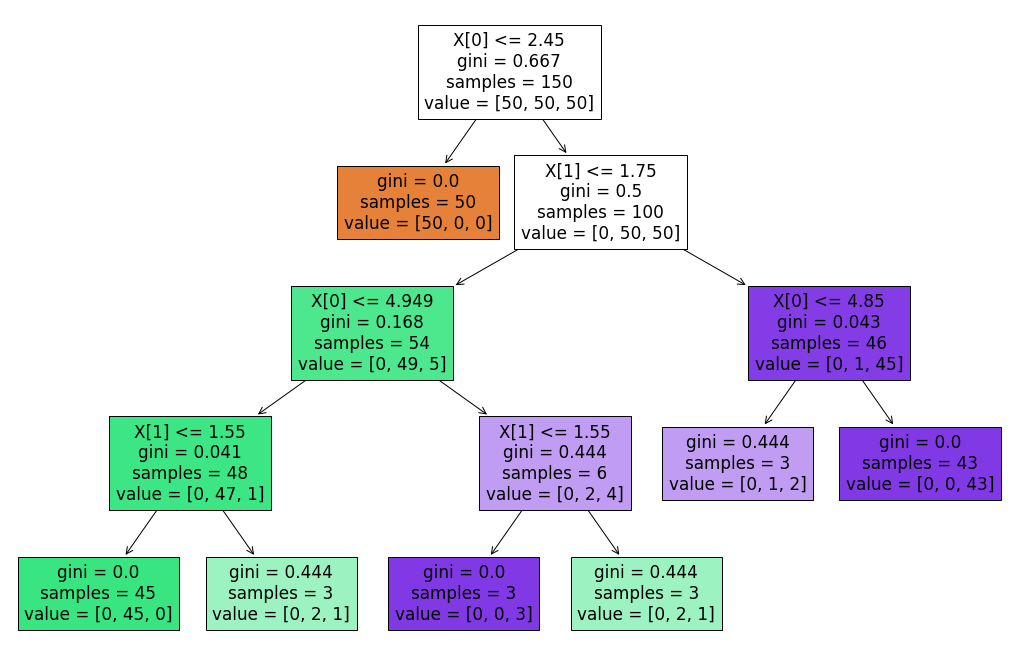

In [149]:
model = DecisionTreeClassifier( max_depth=10,
                               min_samples_leaf=3,
                               criterion='gini'
                              )

model.fit(iris[[data.feature_names[2], data.feature_names[3]]].values, 
          iris['target'].values
         )
plt.figure(figsize=(18,12), facecolor='white')

plot_tree(model, filled=True)